<H3>Ćwiczenie 1

<H4>Wygeneruj syntetyczny zbiór danych przy użyciu sklearn.datasets.make_gaussian_quantiles.

In [1]:
from sklearn.datasets import make_gaussian_quantiles

In [2]:
data = make_gaussian_quantiles(n_samples = 233968 // 236, n_features = 2, n_classes = 2, random_state = 233968, mean = [3 / 9, 6 / 8], cov = 6 / 9)

<H4>Naucz klasyfiktator SVM z bilioteki sklearn (sklearn.svm.SVC)

In [106]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [4]:
data

(array([[-0.43472057,  0.19448788],
        [-0.00483978,  0.99956946],
        [ 0.02902328,  0.39412618],
        ...,
        [ 0.1015872 ,  0.30152503],
        [ 1.29990673,  0.42895538],
        [-0.23316421,  0.33164804]]),
 array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 

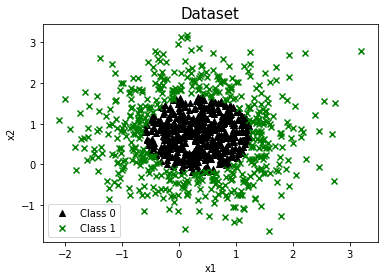

In [5]:
X = data[0]
Y = data[1]

plt.scatter(X[Y==0,0], X[Y==0,1], c='black', marker='^', label = 'Class 0')
plt.scatter(X[Y==1,0], X[Y==1,1], c='g', marker='x', label = 'Class 1')
plt.title('Dataset', fontsize=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

In [6]:
#Normalizacja 
X_normalized = (X-np.tile(np.min(X, axis=0), (X.shape[0],1))) / (np.tile(np.max(X, axis=0)-np.min(X, axis=0), (X.shape[0],1)))

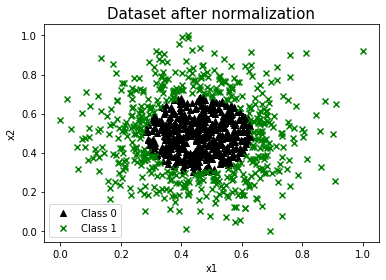

In [7]:
plt.scatter(X_normalized[Y==0,0], X_normalized[Y==0,1], c='black', marker='^', label = 'Class 0')
plt.scatter(X_normalized[Y==1,0], X_normalized[Y==1,1], c='g', marker='x', label = 'Class 1')
plt.title('Dataset after normalization', fontsize=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=100)

In [9]:
X_train.shape

(792, 2)

In [10]:
#Nauczenie klasyfikatora
svm = SVC()
svm.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<H4>Narysuj granice decyzyjną.

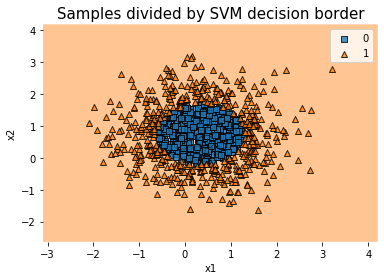

In [11]:
plot_decision_regions(X, Y, clf=svm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Samples divided by SVM decision border', fontsize=15)
plt.legend()

<H4>Porównaj kształt granicy decyzyjnej dla C=1, 10, 100 i 1000.

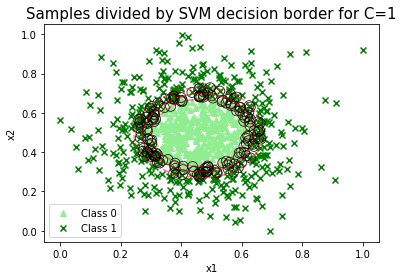

In [12]:
# Wyrysowanie granicy decyzyjnej dla C=1
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1], c='lightgreen', marker='^', label = 'Class 0')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1], c='g', marker='x', label = 'Class 1')

svm1 = SVC(C=1.0)
svm1.fit(X_train,Y_train)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
h = (x_max - x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z1 = svm1.decision_function(xy).reshape(xx.shape)

# Rysowanie granicy decyzyjnej i marginesów
ax.contour(xx, yy, Z1, colors='r', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Rysowanie wektorów wspierających
ax.scatter(svm1.support_vectors_[:, 0], svm1.support_vectors_[:, 1], s=100,
           linewidth=0.7, facecolors='none', edgecolors='black')
plt.title('Samples divided by SVM decision border for C=1', fontsize=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

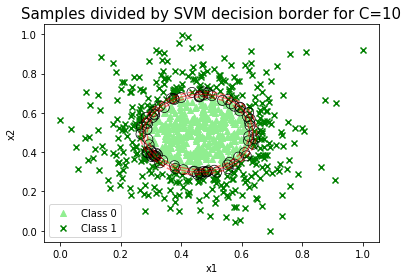

In [13]:
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1], c='lightgreen', marker='^', label = 'Class 0')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1], c='g', marker='x', label = 'Class 1')

svm2 = SVC(C=10.0) 
svm2.fit(X_train,Y_train)

ax2 = plt.gca()

Z2 = svm2.decision_function(xy).reshape(xx.shape)

# Rysowanie granicy decyzyjnej i marginesów
ax2.contour(xx, yy, Z2, colors='r', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Rysowanie wektorów wspierających
ax2.scatter(svm2.support_vectors_[:, 0], svm2.support_vectors_[:, 1], s=100,
           linewidth=0.7, facecolors='none', edgecolors='k')
plt.title('Samples divided by SVM decision border for C=10', fontsize=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

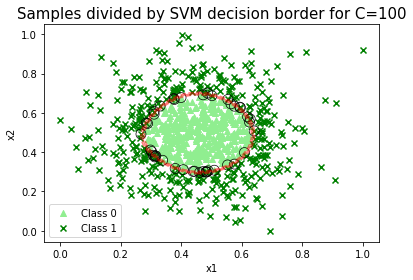

In [14]:
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1], c='lightgreen', marker='^', label = 'Class 0')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1], c='g', marker='x', label = 'Class 1')

svm3 = SVC(C=100.0) 
svm3.fit(X_train,Y_train)

ax3 = plt.gca()

Z3 = svm3.decision_function(xy).reshape(xx.shape)

# Rysowanie granicy decyzyjnej i marginesów
ax3.contour(xx, yy, Z3, colors='r', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Rysowanie wektorów wspierających
ax3.scatter(svm3.support_vectors_[:, 0], svm3.support_vectors_[:, 1], s=100,
           linewidth=0.7, facecolors='none', edgecolors='k')
plt.title('Samples divided by SVM decision border for C=100', fontsize=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

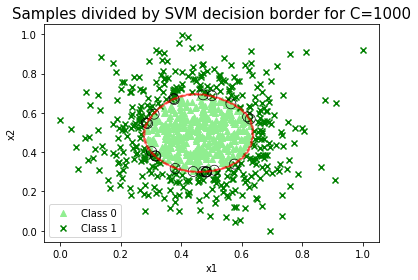

In [15]:
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1], c='lightgreen', marker='^', label = 'Class 0')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1], c='g', marker='x', label = 'Class 1')

svm4 = SVC(C=1000.0) 
svm4.fit(X_train,Y_train)

ax4 = plt.gca()

Z4 = svm4.decision_function(xy).reshape(xx.shape)

# Rysowanie granicy decyzyjnej i marginesów
ax4.contour(xx, yy, Z4, colors='r', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Rysowanie wektorów wspierających
ax4.scatter(svm4.support_vectors_[:, 0], svm4.support_vectors_[:, 1], s=100,
           linewidth=0.7, facecolors='none', edgecolors='k')
plt.title('Samples divided by SVM decision border for C=1000', fontsize=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

Wnioski:
- w zależności od parametru C zmienia się szerokość marginesu
- im wyższa jest wartość parametru C, tym szerokość marginesu jest mniejsza
- dzięki parametrowi C można regulować karę za niewłaściwą klasyfikacją - duże wartości C odpowiadają wysokim karom za niewłaściwą klasyfikację, a małe wartości C - niskim
- dla niższych wartości C można w rozważanym przypadku znaleźć więcej wektorów wspierających

<H4>Porównaj kształt granicy decyzyjnej dla czterech dostepnych funkcji jądra (‘linear’, ‘poly’, ‘sigmoid’).

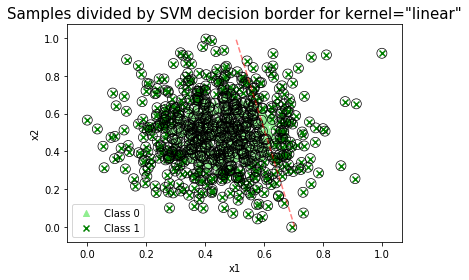

In [16]:
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1], c='lightgreen', marker='^', label = 'Class 0')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1], c='g', marker='x', label = 'Class 1')

svm5 = SVC(kernel='linear') 
svm5.fit(X_train,Y_train)

ax5 = plt.gca()

Z5 = svm5.decision_function(xy).reshape(xx.shape)

# Rysowanie granicy decyzyjnej i marginesów
ax5.contour(xx, yy, Z5, colors='r', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Rysowanie wektorów wspierających
ax5.scatter(svm5.support_vectors_[:, 0], svm5.support_vectors_[:, 1], s=100,
           linewidth=0.7, facecolors='none', edgecolors='k')
plt.title('Samples divided by SVM decision border for kernel="linear"', fontsize=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

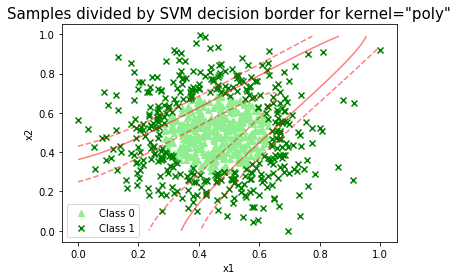

In [17]:
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1], c='lightgreen', marker='^', label = 'Class 0')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1], c='g', marker='x', label = 'Class 1')

svm6 = SVC(kernel='poly') 
svm6.fit(X_train,Y_train)

ax6 = plt.gca()

Z6 = svm6.decision_function(xy).reshape(xx.shape)

# Rysowanie granicy decyzyjnej i marginesów
ax6.contour(xx, yy, Z6, colors='r', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Rysowanie wektorów wspierających
ax5.scatter(svm6.support_vectors_[:, 0], svm6.support_vectors_[:, 1], s=100,
           linewidth=0.7, facecolors='none', edgecolors='k')
plt.title('Samples divided by SVM decision border for kernel="poly"', fontsize=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

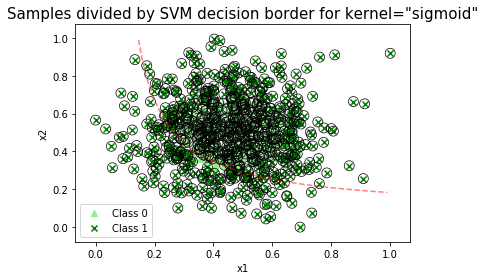

In [18]:
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1], c='lightgreen', marker='^', label = 'Class 0')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1], c='g', marker='x', label = 'Class 1')

svm7 = SVC(kernel='sigmoid') 
svm7.fit(X_train,Y_train)

ax7 = plt.gca()

Z7 = svm7.decision_function(xy).reshape(xx.shape)

# Rysowanie granicy decyzyjnej i marginesów
ax7.contour(xx, yy, Z7, colors='r', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Rysowanie wektorów wspierających
ax7.scatter(svm7.support_vectors_[:, 0], svm7.support_vectors_[:, 1], s=100,
           linewidth=0.7, facecolors='none', edgecolors='k')
plt.title('Samples divided by SVM decision border for kernel="sigmoid"', fontsize=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

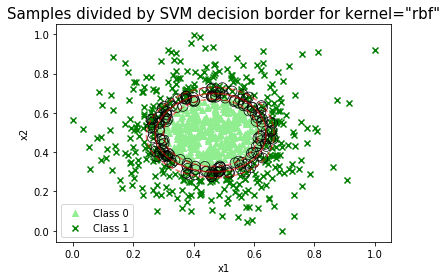

In [19]:
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1], c='lightgreen', marker='^', label = 'Class 0')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1], c='g', marker='x', label = 'Class 1')

svm8 = SVC(kernel='rbf') 
svm8.fit(X_train,Y_train)

ax8 = plt.gca()

Z8 = svm8.decision_function(xy).reshape(xx.shape)

# Rysowanie granicy decyzyjnej i marginesów
ax8.contour(xx, yy, Z8, colors='r', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Rysowanie wektorów wspierających
ax8.scatter(svm8.support_vectors_[:, 0], svm8.support_vectors_[:, 1], s=100,
           linewidth=0.7, facecolors='none', edgecolors='k')
plt.title('Samples divided by SVM decision border for kernel="rbf"', fontsize=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

Wnioski:
- parametr 'kernel' odpowiada za wykorzystywaną do obliczeń funkcję jądra
- funkcja jądra pozwala na niejawne zwiększenie wymiarowości i umożliwia tym samym podział przestrzeni próbek przez hiperpłaszczyznę, co na powyższych wykresach widzimy jako różne kształty granicy decyzyjnej
- jako funkcji jądra w powyższych przypadkach użyto kolejno 'linear' - funkcji liniowej, 'poly' - funkcji wielomianowej, 'sigmoid' - funkcji sigmoidalnej oraz 'rbf' - funkcji radialnej
- dla rozważanego zbioru danych poprawne rozdzielenie próbek zapewnia jedynie funkcja radialna - jest to najchętniej wykorzystywana funkcja jądra

<H3>Ćwiczenie 2

In [21]:
ok=False
while ok==False:
    NazwaPliku = input('Wpisz ścieżkę do pliku: ')

    try:
        df=pd.read_csv(NazwaPliku, header=None) 
        ok=True
    except FileNotFoundError:
        print('Nieprawidłowa ścieżka. Spróbuj ponownie: ')
        ok=False
#C:/Users/Ryzen/Desktop/PŁ/II stopień/PUM/HTRU2/HTRU_2.csv

Wpisz ścieżkę do pliku: C:/Users/Ryzen/Desktop/PŁ/II stopień/PUM/HTRU2/HTRU_2.csv


In [22]:
df

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


<H4>Policz ilość brakujących wartości w każdej z kolumn.

Znaczenie poszczególnych kolumn
1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

In [23]:
missing_values = np.zeros((df.shape[1]))

for i in range(df.shape[1]):
    missing_values[i] = df[:][i].isnull().sum(axis = 0)
    print("Missing values for column ", i, ": ", missing_values[i]) 

#A więc w tabeli nie ma brakujących wartości

Missing values for column  0 :  0.0
Missing values for column  1 :  0.0
Missing values for column  2 :  0.0
Missing values for column  3 :  0.0
Missing values for column  4 :  0.0
Missing values for column  5 :  0.0
Missing values for column  6 :  0.0
Missing values for column  7 :  0.0
Missing values for column  8 :  0.0


<H4>Stwórz dwie kopie zbioru, na jednej z nich dokonaj obcięcia obserwacji odstających.

In [51]:
data_copy1 = df.copy()
data_copy2 = df.copy() # Na tym zbiorze dokonam modyfikacji
data_copy3 = df.copy() # Dodatkowy zbiór, w którym wyeliminuję próbki odstające

In [25]:
# Obliczanie rozstępu ćwiartkowego dla każdej z kolumn
q1 = data_copy2.loc[:,:7].quantile(0.25)
q3 = data_copy2.loc[:,:7].quantile(0.75)
iqr = q3 - q1
print(iqr)

0     26.156250
1      8.647184
2      0.446227
3      1.116355
4      3.541179
5     13.990773
6      4.921454
7    104.348826
dtype: float64


In [79]:
#Obcinanie wartości poniżej -1.5 IQR i powyżej +1.5 IQR
new_data = data_copy2.copy()

for i in range(data_copy2.shape[1]-1):
    for j in range(data_copy2.shape[0]):
        if (data_copy2.iloc[j,i] < (q1[i] - 1.5 * iqr[i])):
            new_data.iloc[j,i] = q1[i] - 1.5 * iqr[i]
        elif(data_copy2.iloc[j,i] > (q3[i] + 1.5 * iqr[i])):
            new_data.iloc[j,i] = q3[i] + 1.5 * iqr[i]

In [80]:
#Eliminacja wartości odstających dla zbioru 3
new_data3 = data_copy3[~((data_copy3.loc[:,:7] < (q1 - 1.5 * iqr)) | 
                (data_copy3.loc[:,:7] > (q3 + 1.5 * iqr))).any(axis=1)]

In [81]:
data_copy2.shape

(17898, 9)

In [82]:
new_data.shape

(17898, 9)

In [83]:
new_data3.shape

(13320, 9)

<H4>Dokonaj normalizacji danych w obu zbiorach.

In [84]:
# Normalizacja dla kopii zbioru podstawowego
data_copy1_normalized = (data_copy1.loc[:,:7]-np.tile(np.min(data_copy1.loc[:,:7], axis=0), (data_copy1.loc[:,:7].shape[0],1))) / (np.tile(np.max(data_copy1.loc[:,:7], axis=0)-np.min(data_copy1.loc[:,:7], axis=0), (data_copy1.loc[:,:7].shape[0],1)))

In [85]:
data_copy1_normalized

,0,1,2,3,4,5,6,7
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369
...,...,...,...,...,...,...,...,...
17893,0.699218,0.473948,0.169741,0.015077,0.004855,0.046437,0.493364,0.241336
17894,0.624942,0.333936,0.201496,0.030260,0.072572,0.360761,0.161482,0.008612
17895,0.607712,0.475144,0.204652,0.015007,0.095069,0.498699,0.149653,0.005509
17896,0.581866,0.393617,0.208855,0.025283,0.007766,0.058209,0.348926,0.114181


In [86]:
Y1 = data_copy1.loc[:,8]

In [87]:
# Normalizacja dla zbioru po zmianach
new_data_normalized = (new_data.loc[:,:7]-np.tile(np.min(new_data.loc[:,:7], axis=0), (new_data.loc[:,:7].shape[0],1))) / (np.tile(np.max(new_data.loc[:,:7], axis=0)-np.min(new_data.loc[:,:7], axis=0), (new_data.loc[:,:7].shape[0],1)))

In [121]:
new_data_normalized

,0,1,2,3,4,5,6,7
0,0.753808,0.759743,0.228399,0.248563,0.282749,0.279232,0.486452,0.255933
1,0.390084,0.852219,0.620514,0.290564,0.138604,0.178141,0.618575,0.434407
2,0.394937,0.287273,0.540964,0.647001,0.275308,0.341887,0.474275,0.218760
3,0.717369,0.802955,0.321489,0.262994,0.324702,0.323207,0.431639,0.186598
4,0.258363,0.325741,0.696455,0.663460,0.091426,0.097477,0.806177,0.854722
...,...,...,...,...,...,...,...,...
17893,0.714307,0.880118,0.254577,0.239808,0.102587,0.114063,0.866153,0.966752
17894,0.581691,0.580546,0.431518,0.481304,1.000000,0.886134,0.230924,0.034499
17895,0.550926,0.882677,0.449102,0.238692,1.000000,1.000000,0.208282,0.022068
17896,0.504779,0.708241,0.472519,0.402143,0.164092,0.142977,0.589696,0.457393


In [89]:
Y2 = new_data.loc[:,8]

In [90]:
# Normalizacja dla zbioru po zmianach (zbiór 3)
new_data3_normalized = (new_data3.loc[:,:7]-np.tile(np.min(new_data3.loc[:,:7], axis=0), (new_data3.loc[:,:7].shape[0],1))) / (np.tile(np.max(new_data3.loc[:,:7], axis=0)-np.min(new_data3.loc[:,:7], axis=0), (new_data3.loc[:,:7].shape[0],1)))

In [91]:
Y3 = new_data3.loc[:,8]

<H4>Dokonaj poprawnego podziału danych na zbiory testowe i treningowe (w obu zbiorach w taki sam sposób).

In [92]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(data_copy1_normalized, Y1, test_size=0.2, random_state=100)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(new_data_normalized, Y2, test_size=0.2, random_state=100)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(new_data3_normalized, Y3, test_size=0.2, random_state=100)

<H4>Porównaj accuracy dla C=1 i 1000 oraz funckji jądra 'rbf' oraz 'linear'.

In [93]:
#Obliczenia dla zbioru 1
svm_data1_1 = SVC(C=1, kernel='rbf')
svm_data1_2 = SVC(C=1, kernel='linear')
svm_data1_3 = SVC(C=1000, kernel='rbf')
svm_data1_4 = SVC(C=1000, kernel='linear')

svm_data1_1.fit(X1_train,Y1_train)
svm_data1_2.fit(X1_train,Y1_train)
svm_data1_3.fit(X1_train,Y1_train)
svm_data1_4.fit(X1_train,Y1_train)

Y1_1_predicted = svm_data1_1.predict(X1_test)
Y1_2_predicted = svm_data1_2.predict(X1_test)
Y1_3_predicted = svm_data1_3.predict(X1_test)
Y1_4_predicted = svm_data1_4.predict(X1_test)

accuracy1_1 = accuracy_score(Y1_test, Y1_1_predicted)
accuracy1_2 = accuracy_score(Y1_test, Y1_2_predicted)
accuracy1_3 = accuracy_score(Y1_test, Y1_3_predicted)
accuracy1_4 = accuracy_score(Y1_test, Y1_4_predicted)

print("Accuracy score for set 1, C=1, kernel='rbf': ", accuracy1_1)
print("Accuracy score for set 1, C=1, kernel='linear': ", accuracy1_2)
print("Accuracy score for set 1, C=1000, kernel='rbf': ", accuracy1_3)
print("Accuracy score for set 1, C=1000, kernel='linear': ", accuracy1_4)

Accuracy score for set 1, C=1, kernel='rbf':  0.9798882681564246
Accuracy score for set 1, C=1, kernel='linear':  0.9773743016759776
Accuracy score for set 1, C=1000, kernel='rbf':  0.9824022346368715
Accuracy score for set 1, C=1000, kernel='linear':  0.9812849162011174


In [94]:
#Obliczenia dla zbioru 2
svm_data2_1 = SVC(C=1, kernel='rbf')
svm_data2_2 = SVC(C=1, kernel='linear')
svm_data2_3 = SVC(C=1000, kernel='rbf')
svm_data2_4 = SVC(C=1000, kernel='linear')

svm_data2_1.fit(X2_train,Y2_train)
svm_data2_2.fit(X2_train,Y2_train)
svm_data2_3.fit(X2_train,Y2_train)
svm_data2_4.fit(X2_train,Y2_train)

Y2_1_predicted = svm_data2_1.predict(X2_test)
Y2_2_predicted = svm_data2_2.predict(X2_test)
Y2_3_predicted = svm_data2_3.predict(X2_test)
Y2_4_predicted = svm_data2_4.predict(X2_test)

accuracy2_1 = accuracy_score(Y2_test, Y2_1_predicted)
accuracy2_2 = accuracy_score(Y2_test, Y2_2_predicted)
accuracy2_3 = accuracy_score(Y2_test, Y2_3_predicted)
accuracy2_4 = accuracy_score(Y2_test, Y2_4_predicted)

print("Accuracy score for set 2, C=1, kernel='rbf': ", accuracy2_1)
print("Accuracy score for set 2, C=1, kernel='linear': ", accuracy2_2)
print("Accuracy score for set 2, C=1000, kernel='rbf': ", accuracy2_3)
print("Accuracy score for set 2, C=1000, kernel='linear': ", accuracy2_4)

Accuracy score for set 2, C=1, kernel='rbf':  0.9779329608938547
Accuracy score for set 2, C=1, kernel='linear':  0.9787709497206704
Accuracy score for set 2, C=1000, kernel='rbf':  0.9826815642458101
Accuracy score for set 2, C=1000, kernel='linear':  0.9801675977653631


In [95]:
#Obliczenia dla zbioru 3
svm_data3_1 = SVC(C=1, kernel='rbf')
svm_data3_2 = SVC(C=1, kernel='linear')
svm_data3_3 = SVC(C=1000, kernel='rbf')
svm_data3_4 = SVC(C=1000, kernel='linear')

svm_data3_1.fit(X3_train,Y3_train)
svm_data3_2.fit(X3_train,Y3_train)
svm_data3_3.fit(X3_train,Y3_train)
svm_data3_4.fit(X3_train,Y3_train)

Y3_1_predicted = svm_data3_1.predict(X3_test)
Y3_2_predicted = svm_data3_2.predict(X3_test)
Y3_3_predicted = svm_data3_3.predict(X3_test)
Y3_4_predicted = svm_data3_4.predict(X3_test)

accuracy3_1 = accuracy_score(Y3_test, Y3_1_predicted)
accuracy3_2 = accuracy_score(Y3_test, Y3_2_predicted)
accuracy3_3 = accuracy_score(Y3_test, Y3_3_predicted)
accuracy3_4 = accuracy_score(Y3_test, Y3_4_predicted)

print("Accuracy score for set 3, C=1, kernel='rbf': ", accuracy3_1)
print("Accuracy score for set 3, C=1, kernel='linear': ", accuracy3_2)
print("Accuracy score for set 3, C=1000, kernel='rbf': ", accuracy3_3)
print("Accuracy score for set 3, C=1000, kernel='linear': ", accuracy3_4)

Accuracy score for set 3, C=1, kernel='rbf':  0.9921171171171171
Accuracy score for set 3, C=1, kernel='linear':  0.9921171171171171
Accuracy score for set 3, C=1000, kernel='rbf':  0.9898648648648649
Accuracy score for set 3, C=1000, kernel='linear':  0.9921171171171171


Wnioski:
- dla niezmienionego zbioru danych najlepsze wyniki osiągnęła metoda SVM dla C=1000 i radialnej funkcji jądra (0.9824)
- dla zbioru danych z obciętymi obserwacjami odstającymi najlepsze wyniki osiągnęła metoda SVM dla C=1000 i radialnej funkcji jądra (0.9826)
- dla zbioru danych z wyeliminowanymi obserwacjami odstającymi najlepsze wyniki osiągnęły metody SVM dla C=1 i radialnej funkcji jądra, dla C=1000 i radialnej funkcj i jądra oraz dla C=1000 i liniowej funkcji jądra (po 0.992)
- różnica w trafności oceny dla zbioru bez wprowadzonych zmian oraz zbioru z obciętymi wartościami odstającymi są niewielkie, jednak lepsze wyniki osiągnięto dla zbioru po modyfikacjach
- zdecydowanie najlepsze wyniki osiągnięto dla zbioru z wyeliminowanymi wartościami odstającymi
- dla zbioru niezmodyfikowanego i zbioru z obciętymi wartościami odstającymi ten sam typ funkcji jądra (radialna) i wartośćć C (1000) okazały się najskuteczniejsze, jednocześnie jest to najmniej skuteczny rodzaj SVM dla zbioru z wyeliminowanymi wartościami odstającymi, co świadczy o znaczącym wpływie wyeliminowanych próbek na ostateczny wynik podziału
- dla wszystkich sprawdzanych parametrów i zbiorów metoda SVM osiągnęła wysokie wartości skuteczności klasyfikacji próbek testowych (98-99%), co oznacza, że jest to metoda bardzo dobrze radząca sobie zarówno ze zbiorami zawierającymi próbki odstające (prawdopodobnie uzyskane przez błędy pomiarowe) jak i ze zbiorami, które zostały zmodyfikowane w celu eliminacji czy też obcięcia tego typu próbek

<H4>Dla najlepszego zestawu hiperparametrów wyświetl confusion matrix. Do jakich wartości macierzy powinno się dążyć jeżeli mamy wybrać cel dla pierwszej sondy mającej z bliska zbadać pulsara?

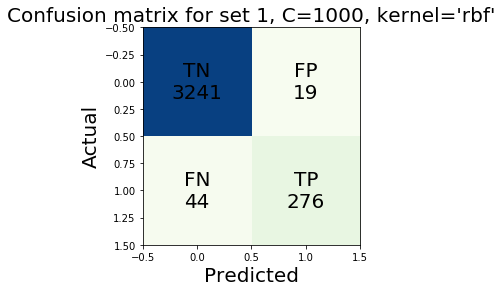

In [118]:
#Confusion matrix dla niezmienionego zbioru danych i najlepszego zestawu hiperparametrów

plt.figure()
cm_1 = confusion_matrix(Y1_test, Y1_3_predicted)
plt.imshow(cm_1, interpolation='nearest', cmap=plt.cm.GnBu)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title("Confusion matrix for set 1, C=1000, kernel='rbf'", fontsize=20)
s= [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"\n"+str(cm_1[i][j]), fontsize=20, verticalalignment='center', horizontalalignment='center')

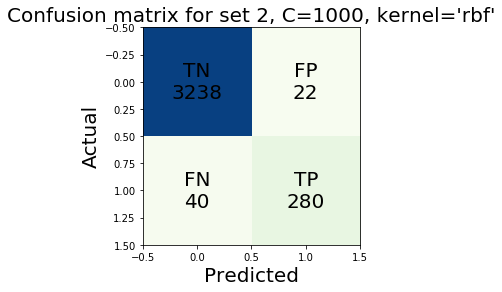

In [119]:
#Confusion matrix dla zbioru danych z odciętymi wartościami odstającymi i najlepszego zestawu hiperparametrów

plt.figure()
cm_2 = confusion_matrix(Y2_test, Y2_3_predicted)
plt.imshow(cm_2, interpolation='nearest', cmap=plt.cm.GnBu)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title("Confusion matrix for set 2, C=1000, kernel='rbf'", fontsize=20)
s= [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"\n"+str(cm_2[i][j]), fontsize=20, verticalalignment='center', horizontalalignment='center')

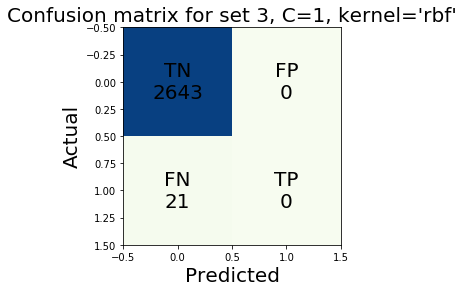

In [103]:
#Confusion matrix dla zbioru danych z wyeliminowanymi wartościami odstającymi i jednego z 3 najlepszych zestawów hiperparametrów

plt.figure()
cm_3 = confusion_matrix(Y3_test, Y3_1_predicted)
plt.imshow(cm_3, interpolation='nearest', cmap=plt.cm.GnBu)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)
plt.title("Confusion matrix for set 3, C=1, kernel='rbf'", fontsize=20)
s= [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+"\n"+str(cm_3[i][j]), fontsize=20, verticalalignment='center', horizontalalignment='center')

<div style="text-align: justify">Aby wybrać cel dla sondy mającej z bliska zbadać pulsar (klasa 1 - positive) powinniśmy dążyć do tego, aby wartość TP (True Positive) macierzy była jak najwyższa, a wartość FP (False Positive) jak najniższa. Mając to na uwadze można łatwo zauważyć, że mimo, że dla zbióru, który został zmodyfikowany przez eliminację wartości odstających, wartość accuracy była najwyższa, wartości FP i TP są równe 0, co oznacza, że ten sposób modyfikacji danych jest w podanym przypadku kompletnie bezużyteczny. 

Najwyższą wartość TP otrzymałam natomiast dla predykcji przy pomocy SVM dla próbek zbioru z odciętymi wartościami odstającymi. Jednocześnie dla tego zbioru otrzymałam najwyższą wartość FP. Dlatego przy wyborze najlepszej metody klasyfikacji dla zbiorów, dla których zależy nam przede wszystkim na prawidłowej klasyfikacji dla próbek pozytywnych warto zastosować wskaźnik wiarygodności wyniku dodatniego LR+.</div>

$$
LR+ = \frac{TPR}{FPR}
$$

gdzie:

$$
TPR = \frac{TP}{TP + FN}
$$


$$
FPR = \frac{FP}{FP + TN}
$$

In [138]:
# LR+ dla pierwszego zbioru
# LR+ = (TP/(TP+FN))/(FP/(FP+FN))
TP1 = cm_1[1][1]
FN1 = cm_1[1][0]
FP1 = cm_1[0][1]
TN1 = cm_1[0][0]
TPR1 = TP1/(TP1+FN1)
FPR1 = FP1/(FP1+TN1)
LRplus1 = TPR1/FPR1

print("LR+ for dataset 1: ", LRplus1)

LR+ for dataset 1:  147.98684210526315


In [139]:
# LR+ dla drugiego zbioru
TP2 = cm_2[1][1]
FN2 = cm_2[1][0]
FP2 = cm_2[0][1]
TN2 = cm_2[0][0]
TPR2 = TP2/(TP2+FN2)
FPR2 = FP2/(FP2+TN2)
LRplus2 = TPR2/FPR2

print("LR+ for dataset 2: ", LRplus2)

LR+ for dataset 2:  129.6590909090909


<div style="text-align: justify">Jak widać powyżej wskaźnik LR+ przyjmuje wyższą wartość dla zbioru bez odcinania wartości odstających. Zatem w przypadku danych tego zbioru najlepiej jest klasyfikować próbki przy pomocy metody SVM dla C=1000, radialnej funkcji jądra i jedynie znormalizowanego zbioru danych.</div>

<H4>Narysuj krzywą ROC. Policz pole pod krzywą ROC.

In [140]:
#Rysuję krzywą ROC dla SVC z najlepszym zestawem hiperparametrów 
#dla zbioru danych po obcięciu wartości odstających
fpr2, tpr2, _ = roc_curve(Y2_test, Y2_3_predicted)
roc_auc2 = auc(fpr2, tpr2)

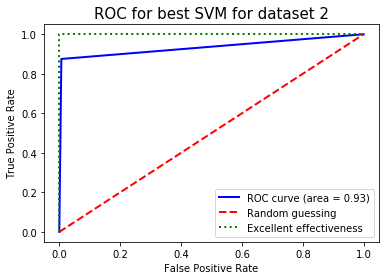

In [143]:
plt.plot(fpr2, tpr2, color='b', lw=2, label='ROC curve (area = %0.2f)' %roc_auc2)
plt.plot([0,1], [0,1], color='r', lw=2, ls='--', label='Random guessing')
plt.plot([0, 0, 1], [0, 1, 1], lw=2, ls=':', c='g', label='Excellent effectiveness')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for best SVM for dataset 2', fontsize=15)
plt.legend(loc='lower right')
plt.show()

Wnioski:
- jakość uzyskanego klasyfikatora jest bardzo dobra, ponieważ jest bliska idealnemu klasyfikatorowi, który na wykresie jest oznaczony zieloną punktową linią, a pole pod krzywą ROC jest bliskie 1 